**Project Check-in 5**

In [1]:
%pip install --upgrade pip
%pip install scikit-lego
%pip install seaborn
%pip install nbstripout
!nbstripout --install

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
fatal: --local can only be used inside a git repository
Installation failed: not a git repository!


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD
df = pd.read_csv("./dataset.csv")

1. We chose to run PCA on our data.

2. See below

3. N/A

In [10]:
# Step 1: Clean Data
# Remove duplicates
df_cleaned = df.drop(columns='Unnamed: 0').drop_duplicates(subset=['track_id','album_name','artists','track_name'])

# Remove columns with every row unique. Also dropping artist and album because it would be too much one-hot encoding
df_cleaned.drop(columns=['track_id', 'track_name', 'artists','album_name'], inplace=True)
df_cleaned.dropna(axis=0,inplace=True)

#The columns with object datatype will be categorical
columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_cleaned = df_cleaned[columns]

scaler = StandardScaler()
df_cleaned = scaler.fit_transform(df_cleaned)
df_cleaned = pd.DataFrame(df_cleaned, columns=columns)

Text(0.5, 1.0, 'Scree Plot')

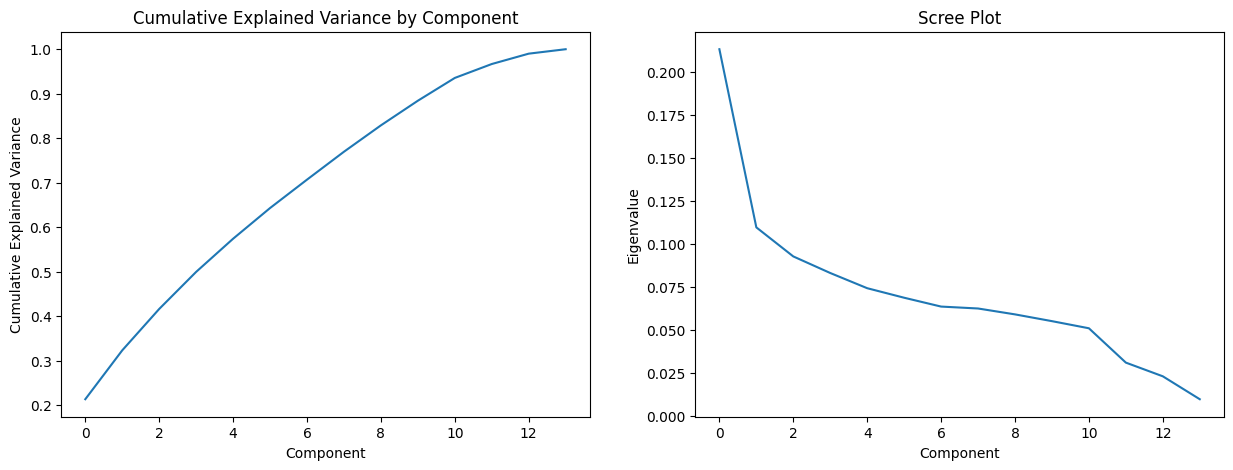

In [12]:
pca = PCA(n_components=14) # 14 principal components for 14 features (don't have to use them all)
transformed_data = pca.fit_transform(df_cleaned)
eigenvalues = pca.explained_variance_ratio_
cumulative_explained_variance = eigenvalues.cumsum()

fig, ax = plt.subplots(1,2, figsize=(15,5))

# For both graphs, the principal component number starts at 0 not 1

# Plot the cumulative explained variance
ax[0].plot(cumulative_explained_variance)
ax[0].set_xlabel("Component")
ax[0].set_ylabel("Cumulative Explained Variance")
ax[0].set_title("Cumulative Explained Variance by Component")

# Plot the eigenvalues to create the scree plot
ax[1].plot(eigenvalues)
ax[1].set_xlabel("Component")
ax[1].set_ylabel("Eigenvalue")
ax[1].set_title("Scree Plot")


4. As our dataset has 14 numerical features, we are trying to see if we can use principal component analysis as a dimensionality reduction technique, in order to reduce the complexity of our data. Judging from the cumulative explained variance graph, it seems like we would still need a decent number of components to accurately describe our data. In future iterations, we were considering clustering prior to PCA, so that we could graph our data on the first 2 principal components and see if the clusters spread out, however, it is unlikely that plotting the first two principal components will capture a lot of the variability in the data, considering that they only make up around 30% of the variance. Given this, the clusters may not be easily separated on the first two components, and will likely heavily overlap.